<a href="https://colab.research.google.com/github/cristian-rincon/escuela-datascience/blob/master/manipulacion_datos_pandas/13_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
API_SP.POP.TOTL_DS2_en_csv_v2_1308146  poblacion.csv  test.parquet
covid_19_data.csv		       test.csv       test.pkl
dataset_london_bikeshare.csv	       test.hdf       test.xlsx
Meteorite_Landings.csv		       test.json


In [4]:
import pandas as pd
pd.__version__

'1.0.5'

In [5]:
df = pd.read_csv('covid_19_data.csv')
df.sample(10)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [6]:
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]

df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
83406,2020-08-09,Ukraine,937.0,22.0,652.0
83407,2020-08-09,Netherlands,918.0,69.0,0.0
83408,2020-08-09,Mainland China,1273.0,1.0,1268.0
83409,2020-08-09,Ukraine,2131.0,41.0,1524.0


In [7]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [8]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [9]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [10]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [11]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-05,18811953.0,707820.0,11356275.0
2020-08-06,19097149.0,714940.0,11545401.0
2020-08-07,19378036.0,721324.0,11737927.0


In [12]:
df_time.diff().mean()

Confirmed    99305.640
Deaths        3656.545
Recovered    60578.985
dtype: float64

In [13]:
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-05,271164.0,7084.0,221540.0
2020-08-06,285196.0,7120.0,189126.0
2020-08-07,280887.0,6384.0,192526.0


In [14]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [15]:
df_diff = df_diff.fillna({'Confirmed':  555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

In [16]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-05,271164.0,7084.0,221540.0
2020-08-06,285196.0,7120.0,189126.0
2020-08-07,280887.0,6384.0,192526.0


In [17]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-05,18811953.0,707820.0,11356275.0
2020-08-06,19097149.0,714940.0,11545401.0
2020-08-07,19378036.0,721324.0,11737927.0


In [18]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,771474.0,39166.0,138246.0
2020-04-30,2399359.0,191281.0,836725.0
2020-05-31,2910100.0,138647.0,1626576.0
2020-06-30,4308892.0,139218.0,2711943.0
2020-07-31,7123998.0,168247.0,5015868.0
2020-08-31,2261847.0,51826.0,1746685.0


In [19]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,9,9,9


In [24]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-07 00:00:00,19378036.0,721324.0,11737927.0
2020-08-07 12:00:00,NaN,NaN,NaN
2020-08-08 00:00:00,19637506.0,726781.0,11939109.0


In [28]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-07 00:00:00,19378036.0,721324.0,11737927.0
2020-08-07 12:00:00,19507771.0,724052.5,11838518.0
2020-08-08 00:00:00,19637506.0,726781.0,11939109.0


In [34]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-08-07 00:00:00,19378036.0,721324.0,11737927.0,0.962776
2020-08-07 12:00:00,19507771.0,724052.5,11838518.0,0.962884
2020-08-08 00:00:00,19637506.0,726781.0,11939109.0,0.962990


In [39]:
df_cum = df_cum.reset_index()
df_cum

,index,ObservationDate,Confirmed,Deaths,Recovered,rate
0,0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...,...
396,396,2020-08-07 00:00:00,19378036.0,721324.0,11737927.0,0.962776
397,397,2020-08-07 12:00:00,19507771.0,724052.5,11838518.0,0.962884
398,398,2020-08-08 00:00:00,19637506.0,726781.0,11939109.0,0.962990
399,399,2020-08-08 12:00:00,19749594.5,729053.5,12027467.0,0.963085


In [40]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.960070
2020-04-30,0.936029
2020-05-31,0.933422
2020-06-30,0.945713
2020-07-31,0.957037
2020-08-31,0.962405


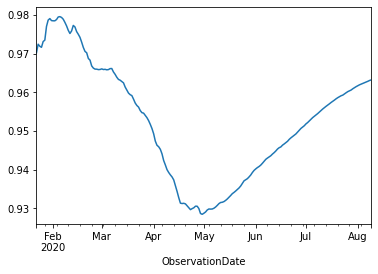

In [43]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

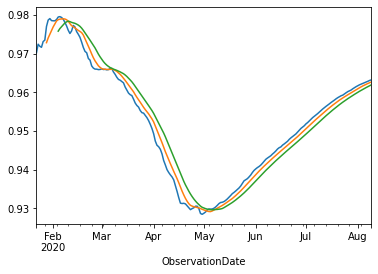

In [45]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

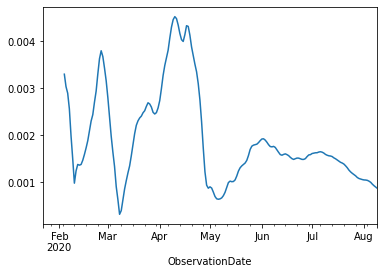

In [48]:
import numpy as np

sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

## Herramientas de visualización incluidas en pandas

In [49]:
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
83406,2020-08-09,Ukraine,937.0,22.0,652.0
83407,2020-08-09,Netherlands,918.0,69.0,0.0
83408,2020-08-09,Mainland China,1273.0,1.0,1268.0
83409,2020-08-09,Ukraine,2131.0,41.0,1524.0


In [52]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Brazil             627126.0
South Africa       559859.0
US                 559746.0
India              515332.0
Russia             405843.0
                     ...   
Gambia, The             1.0
East Timor              1.0
Curacao                 1.0
Channel Islands         1.0
 Azerbaijan             1.0
Name: Confirmed, Length: 223, dtype: float64

In [54]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate', freq='1D')]).sum()

df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[30281 rows x 3 columns]

### Covid 19 en Brazil

In [56]:
df_brazil = df_time.loc['Brazil',:]
df_brazil

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-23,0.0,0.0,0.0
2020-02-26,1.0,0.0,0.0
2020-02-27,1.0,0.0,0.0
2020-02-28,1.0,0.0,0.0
2020-02-29,2.0,0.0,0.0
...,...,...,...
2020-08-05,2859073.0,97256.0,2190361.0
2020-08-06,2912212.0,98493.0,2230542.0
2020-08-07,2962442.0,99572.0,2272299.0


In [60]:
import matplotlib.pyplot as plt

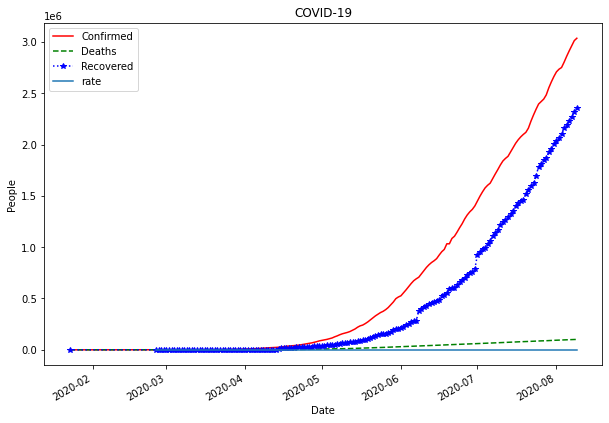

In [100]:
ax = df_brazil.plot(figsize = (10,7), title = "COVID-19",
               legend=True,
               style=['r-','g--','b:*'])
# ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [67]:
df_monthly = df_brazil.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.0,0.0,0.0
2020-02-29,2.0,0.0,0.0
2020-03-31,5717.0,201.0,127.0
2020-04-30,87187.0,6006.0,35935.0
2020-05-31,514849.0,29314.0,206555.0
2020-06-30,1402041.0,59594.0,788318.0
2020-07-31,2662485.0,92475.0,2008854.0
2020-08-31,3035422.0,101049.0,2356983.0


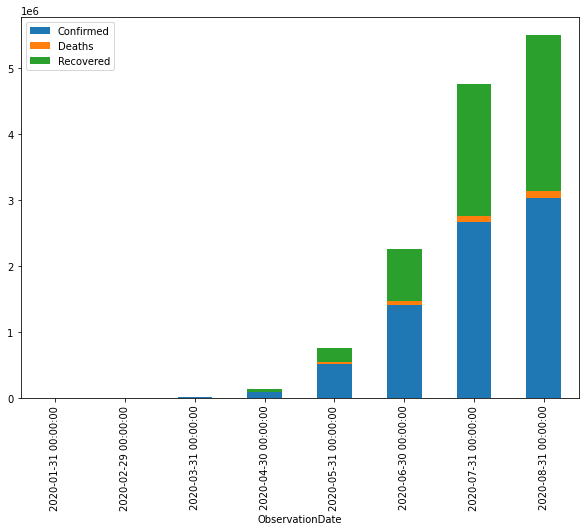

In [70]:
df_monthly.plot(figsize = (10,7),kind='bar', stacked=True)

In [72]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,0.0,0.0,0.0,0.0
2020-02-29,2.0,0.0,0.0,2.0
2020-03-31,5717.0,201.0,127.0,5389.0
2020-04-30,87187.0,6006.0,35935.0,45246.0
2020-05-31,514849.0,29314.0,206555.0,278980.0
2020-06-30,1402041.0,59594.0,788318.0,554129.0
2020-07-31,2662485.0,92475.0,2008854.0,561156.0
2020-08-31,3035422.0,101049.0,2356983.0,577390.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe04a6a048>,
      dtype=object)

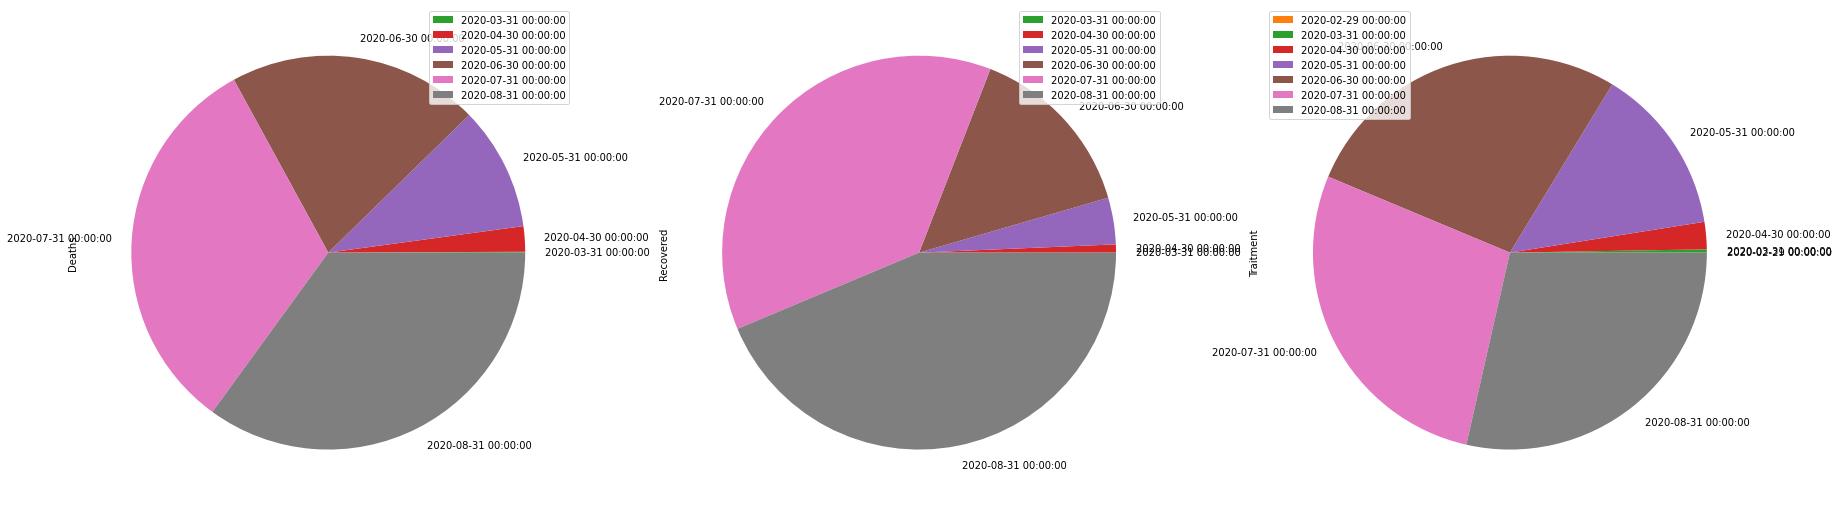

In [94]:
df_monthly[['Deaths', 'Recovered','Traitment']].plot(figsize=(30,40), kind='pie', subplots=True)

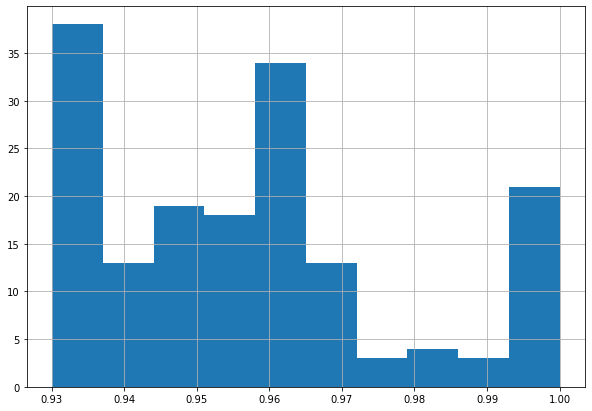

In [97]:
df_brazil['rate'] = 1 - df_brazil['Deaths']/df_brazil['Confirmed']
df_brazil['rate'].hist(figsize=(10,7), bins= 10)

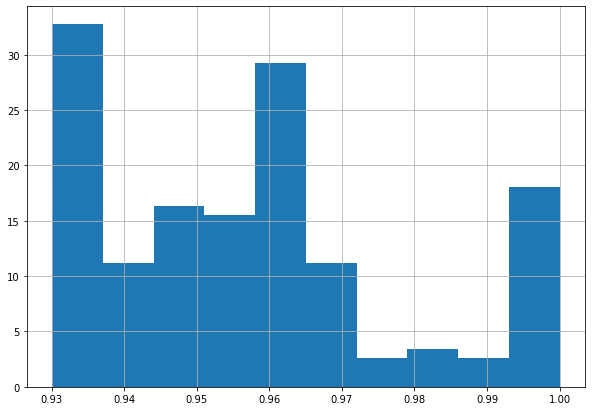

In [99]:
df_brazil['rate'].hist(figsize=(10,7), bins= 10, density=True)